In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
national_election_db = pd.read_excel("/content/indian-national-level-election(excel).xlsx")

# **NATIONAL PRED**

In [ ]:
national_election_db.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


Making new database taking only consideration year, state , constituency and their electors and totvotpoll into consideration

In [ ]:
grouped_national_election_db2 = national_election_db.groupby(['year','st_name', 'pc_no','electors'])['totvotpoll'].sum().reset_index()
grouped_national_election_db2

,year,st_name,pc_no,electors,totvotpoll
0,1977,Andaman & Nicobar Islands,1,85308,60568
1,1977,Andhra Pradesh,1,585062,380951
2,1977,Andhra Pradesh,2,655999,317164
3,1977,Andhra Pradesh,3,635653,330592
4,1977,Andhra Pradesh,4,626272,336577
...,...,...,...,...,...
5929,2014,West Bengal,38,1532244,1320822
5930,2014,West Bengal,39,1583495,1331242
5931,2014,West Bengal,40,1469684,1142395
5932,2014,West Bengal,41,1538421,1304756


Grouping data as per year and state merging constituencies for respective year into 1 state row

In [ ]:
grouped_national_election_db3 = grouped_national_election_db2.groupby(['year', 'st_name'])[['electors', 'totvotpoll']].sum().reset_index()
grouped_national_election_db3

,year,st_name,electors,totvotpoll
0,1977,Andaman & Nicobar Islands,85308,60568
1,1977,Andhra Pradesh,27567618,16705123
2,1977,Arunachal Pradesh,215657,50690
3,1977,Assam,7225616,3823310
4,1977,Bihar,34996402,20874906
...,...,...,...,...
351,2014,Tamil Nadu,55114867,40607149
352,2014,Tripura,2388822,2023829
353,2014,Uttar Pradesh,138810557,81093120
354,2014,Uttarakhand,7127057,4391890


In [ ]:
grouped_national_election_db3['turnout'] = (grouped_national_election_db3['totvotpoll'] / grouped_national_election_db3['electors']) *100
grouped_national_election_db3

,year,st_name,electors,totvotpoll,turnout
0,1977,Andaman & Nicobar Islands,85308,60568,70.999203
1,1977,Andhra Pradesh,27567618,16705123,60.596904
2,1977,Arunachal Pradesh,215657,50690,23.504918
3,1977,Assam,7225616,3823310,52.913274
4,1977,Bihar,34996402,20874906,59.648720
...,...,...,...,...,...
351,2014,Tamil Nadu,55114867,40607149,73.677306
352,2014,Tripura,2388822,2023829,84.720795
353,2014,Uttar Pradesh,138810557,81093120,58.419995
354,2014,Uttarakhand,7127057,4391890,61.622771


In [ ]:
Andhra_Pradesh_data= grouped_national_election_db3[grouped_national_election_db3['st_name'] == 'Andhra Pradesh']
Andhra_Pradesh_data

,year,st_name,electors,totvotpoll,turnout
1,1977,Andhra Pradesh,27567618,16705123,60.596904
32,1980,Andhra Pradesh,30497603,16907792,55.439741
63,1984,Andhra Pradesh,33546487,22609046,67.396166
94,1989,Andhra Pradesh,42475179,28764919,67.721713
125,1991,Andhra Pradesh,42617973,25488643,59.807263
156,1996,Andhra Pradesh,49501274,30474862,61.563793
188,1998,Andhra Pradesh,49133135,31898911,64.923419
220,1999,Andhra Pradesh,49654389,33365484,67.195438
252,2004,Andhra Pradesh,51146342,35762670,69.922244
287,2009,Andhra Pradesh,57897654,42046920,72.622839


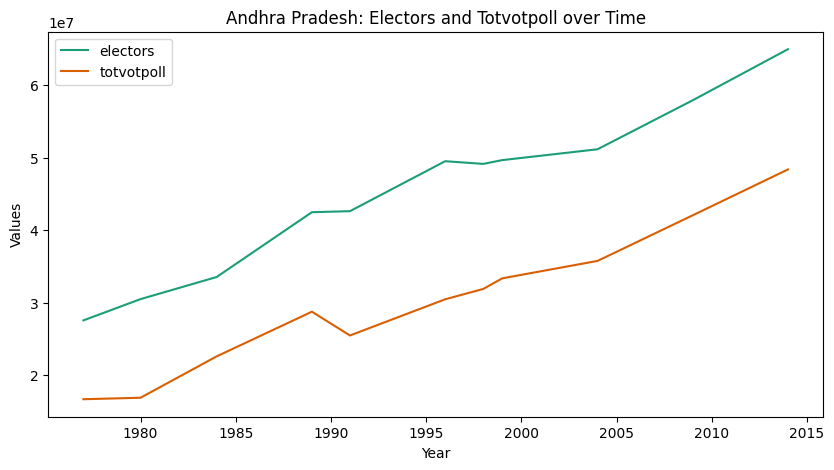

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['year']
    ys = series[series_name]

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5))

df_sorted = Andhra_Pradesh_data.sort_values('year', ascending=True)

_plot_series(df_sorted, 'electors', series_index=0)
_plot_series(df_sorted, 'totvotpoll', series_index=1)

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Andhra Pradesh: Electors and Totvotpoll over Time')
plt.legend()
plt.show()

In [ ]:
#EXPORT THE FINAL DATA
grouped_national_election_db3.to_csv('national_election_db3.csv', index=False)

In [ ]:
#EXPORT BOTH THE FINAL DATA IN EXCEL FORMAT
grouped_national_election_db3.to_excel('national_election_db3.xlsx', index=False)

In [ ]:
election_2014_data = grouped_national_election_db3[grouped_national_election_db3['year'] == 2014]
election_2014_data

,year,st_name,electors,totvotpoll,turnout
321,2014,Andaman & Nicobar Islands,269360,190328,70.659341
322,2014,Andhra Pradesh,64934138,48367188,74.486533
323,2014,Arunachal Pradesh,759344,596956,78.614699
324,2014,Assam,18837713,15085883,80.083410
325,2014,Bihar,63800160,35885332,56.246461
326,2014,Chandigarh,615214,453455,73.706873
327,2014,Chhattisgarh,17664520,12255579,69.379632
328,2014,Dadra & Nagar Haveli,196597,165286,84.073511
329,2014,Daman & Diu,111827,87233,78.007100
330,2014,Goa,1060777,817000,77.019015


**PREDICTON (ANN)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

national_data = pd.read_excel('/content/national_election_db3.xlsx', sheet_name='Sheet1')

label_encoder = LabelEncoder()
national_data['st_name_encoded'] = label_encoder.fit_transform(national_data['st_name'])

features = national_data[['year', 'st_name_encoded']].values
target = national_data['turnout'].values.reshape(-1, 1)

def manual_standard_scaler(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

features_scaled, mean, std = manual_standard_scaler(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def initialize_weights(input_size, layer_sizes):
    weights = []
    biases = []
    prev_size = input_size
    for size in layer_sizes:
        weights.append(np.random.randn(prev_size, size) * 0.1)
        biases.append(np.zeros((1, size)))
        prev_size = size
    return weights, biases

def forward_pass(X, weights, biases, training=True, dropout_rate=0.2):
    activations = [X]
    for i, (W, b) in enumerate(zip(weights[:-1], biases[:-1])):
        Z = np.dot(activations[-1], W) + b
        A = relu(Z)
        if training:
            mask = (np.random.rand(*A.shape) > dropout_rate).astype(float)
            A *= mask
            A /= (1 - dropout_rate)
        activations.append(A)
    Z = np.dot(activations[-1], weights[-1]) + biases[-1]
    activations.append(Z)
    return activations

def backward_pass(y_true, activations, weights):
    grads_w = [None] * len(weights)
    grads_b = [None] * len(weights)
    m = y_true.shape[0]

    error = activations[-1] - y_true
    grads_w[-1] = np.dot(activations[-2].T, error) / m
    grads_b[-1] = np.sum(error, axis=0, keepdims=True) / m

    for i in reversed(range(len(weights) - 1)):
        error = np.dot(error, weights[i + 1].T) * relu_derivative(activations[i + 1])
        grads_w[i] = np.dot(activations[i].T, error) / m
        grads_b[i] = np.sum(error, axis=0, keepdims=True) / m

    return grads_w, grads_b

#using best lr = 0.001
def train(X, y, input_size, hidden_layers, epochs=300, lr=0.001, dropout_rate=0.2, patience=10):
    X_train_main, X_val, y_train_main, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    weights, biases = initialize_weights(input_size, hidden_layers + [1])
    best_weights, best_biases = None, None
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        activations = forward_pass(X_train_main, weights, biases, training=True, dropout_rate=dropout_rate)
        grads_w, grads_b = backward_pass(y_train_main, activations, weights)

        for i in range(len(weights)):
            grads_w[i] += weights[i] / X_train_main.shape[0]
            weights[i] -= lr * grads_w[i]
            biases[i] -= lr * grads_b[i]

        train_pred = forward_pass(X_train_main, weights, biases, training=False)[-1]
        val_pred = forward_pass(X_val, weights, biases, training=False)[-1]
        train_loss = np.mean((train_pred - y_train_main) ** 2)
        val_loss = np.mean((val_pred - y_val) ** 2)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = [w.copy() for w in weights]
            best_biases = [b.copy() for b in biases]
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f" Early stopping at epoch {epoch}")
                break

        if epoch % 10 == 0:
            print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

    return best_weights, best_biases

def predict(X, weights, biases):
    return forward_pass(X, weights, biases, training=False)[-1]

weights, biases = train(X_train, y_train, input_size=2, hidden_layers=[16,32,64],epochs=300, lr=0.001, dropout_rate=0.25, patience=10)

predictions = predict(X_test, weights, biases)
mae = np.mean(np.abs(predictions - y_test))
print(f"Test MAE: {mae:.4f}")

def predict_turnout(year, state_name):
    state_encoded = label_encoder.transform([state_name])[0]
    input_data = np.array([[year, state_encoded]])
    input_scaled = (input_data - mean) / std
    prediction = predict(input_scaled, weights, biases)
    print(f'Predicted turnout for {state_name} in {year}: {prediction[0][0]:.2f}%')

Epoch 0 | Train Loss: 4056.9898 | Val Loss: 4253.4575
Epoch 10 | Train Loss: 3957.0711 | Val Loss: 4152.2361
Epoch 20 | Train Loss: 3819.0323 | Val Loss: 4012.1936
Epoch 30 | Train Loss: 3537.4659 | Val Loss: 3725.5855
Epoch 40 | Train Loss: 2453.4710 | Val Loss: 2611.2630
Epoch 50 | Train Loss: 172.5335 | Val Loss: 272.7219
Epoch 60 | Train Loss: 144.0623 | Val Loss: 263.8791
 Early stopping at epoch 63
Test MAE: 10.5703


In [ ]:
# Predict turnout for all states in 2028
def predict_turnout_all_states(year):
    # Get all unique states
    states = national_data['st_name'].unique()

    for state in states:
        state_encoded = label_encoder.transform([state])[0]
        input_data = np.array([[year, state_encoded]])
        input_scaled = (input_data - mean) / std
        prediction = predict(input_scaled, weights, biases)
        print(f'Predicted turnout for {state} in {year}: {prediction[0][0]:.2f}%')

predict_turnout_all_states(2028)
print("\n")
df_2014 = pd.DataFrame(predict_turnout_all_states(2014))
df_2014.to_csv('predicted_turnout_2014.csv', index=False)




Predicted turnout for Andaman & Nicobar Islands in 2028: 80.34%
Predicted turnout for Andhra Pradesh in 2028: 80.00%
Predicted turnout for Arunachal Pradesh in 2028: 79.65%
Predicted turnout for Assam in 2028: 79.31%
Predicted turnout for Bihar in 2028: 78.97%
Predicted turnout for Chandigarh in 2028: 78.63%
Predicted turnout for Dadra & Nagar Haveli in 2028: 77.61%
Predicted turnout for Goa Daman & Diu in 2028: 76.25%
Predicted turnout for Gujarat in 2028: 75.57%
Predicted turnout for Haryana in 2028: 75.23%
Predicted turnout for Himachal Pradesh in 2028: 74.89%
Predicted turnout for Jammu & Kashmir in 2028: 74.54%
Predicted turnout for Karnataka in 2028: 73.96%
Predicted turnout for Kerala in 2028: 73.72%
Predicted turnout for Lakshadweep in 2028: 73.48%
Predicted turnout for Madhya Pradesh in 2028: 73.25%
Predicted turnout for Maharashtra in 2028: 73.04%
Predicted turnout for Manipur in 2028: 72.86%
Predicted turnout for Meghalaya in 2028: 72.69%
Predicted turnout for Mizoram in 202

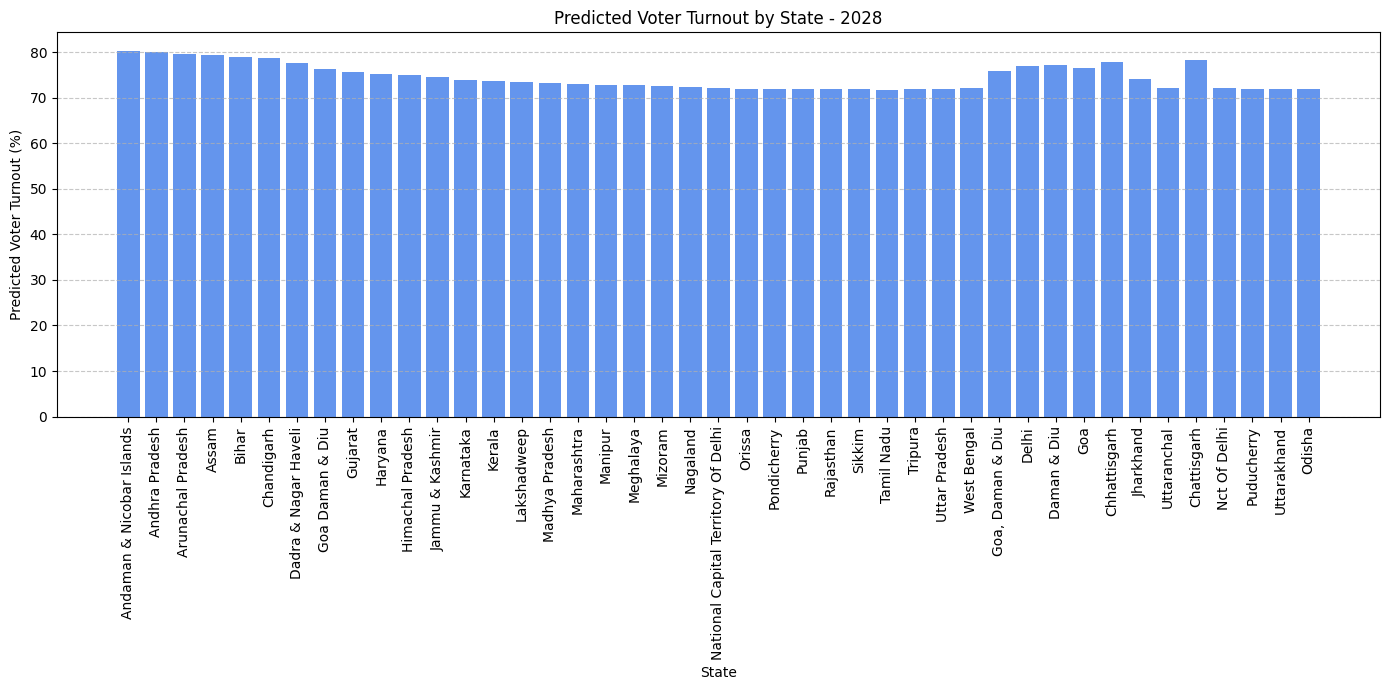

In [ ]:
def predict_turnout_all_states(year):
    states = national_data['st_name'].unique()

    predictions = {}

    for state in states:
        state_encoded = label_encoder.transform([state])[0]
        input_data = np.array([[year, state_encoded]])
        input_scaled = (input_data - mean) / std
        prediction = predict(input_scaled, weights, biases)
        predictions[state] = prediction[0][0]

    return predictions

predicted_turnout = predict_turnout_all_states(2028)

states = list(predicted_turnout.keys())
turnouts = list(predicted_turnout.values())

plt.figure(figsize=(14, 7))
plt.bar(states, turnouts, color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Predicted Voter Turnout (%)')
plt.title('Predicted Voter Turnout by State - 2028')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

MULTIVARIATE REGRESSION

National data

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_excel('national_election_db3.xlsx', sheet_name='Sheet1')

states = data['st_name'].unique()
for state in states[1:]:
    data[f'state_{state}'] = (data['st_name'] == state).astype(int)

data = data.drop(columns=['st_name'])

year_mean = data['year'].mean()
year_std = data['year'].std()
data['year_scaled'] = (data['year'] - year_mean) / year_std

data = data.drop(columns=['year'])

X = data.drop(columns=['turnout']).values
y = data['turnout'].values.reshape(-1, 1)


X_b = np.hstack((np.ones((X.shape[0], 1)), X))

np.random.seed(42)
shuffle_idx = np.random.permutation(len(X_b))
train_size = int(0.8 * len(X_b))
train_idx = shuffle_idx[:train_size]
test_idx = shuffle_idx[train_size:]

X_train, X_test = X_b[train_idx], X_b[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


beta = np.linalg.inv((X_train.T @ X_train) + np.eye(X_train.shape[1]) * 1e-8) @ X_train.T @ y_train

y_pred = X_test @ beta

mae = np.mean(np.abs(y_test - y_pred))
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2 = 1 - (ss_res / ss_total)

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 5.69


In [ ]:
def predict_turnout_for_all_states(year_to_predict):
    print(f"\nPredicted Turnout for All States in {year_to_predict}:\n")

    one_hot_cols = len(beta) - 2

    for i, state in enumerate(states):
        state_one_hot = np.zeros(one_hot_cols)

        if i > 0:
            state_one_hot[i - 1] = 1

        year_scaled = (year_to_predict - year_mean) / year_std

        x_row = np.hstack(([1], [year_scaled], state_one_hot))

        if x_row.shape[0] != beta.shape[0]:
            print(f"Skipping {state}: Feature size mismatch ({x_row.shape[0]} != {beta.shape[0]})")
            continue

        # Predict turnout
        predicted_turnout = x_row @ beta
        print(f"{state}: {predicted_turnout[0]:.2f}%")


predict_turnout_for_all_states(2028)


Predicted Turnout for All States in 2028:

Andaman & Nicobar Islands: 69.21%
Andhra Pradesh: 69.21%
Arunachal Pradesh: 66.12%
Assam: 59.65%
Bihar: 68.28%
Chandigarh: 68.74%
Dadra & Nagar Haveli: 61.39%
Goa Daman & Diu: 72.41%
Gujarat: 69.47%
Haryana: 60.33%
Himachal Pradesh: 67.05%
Jammu & Kashmir: 61.03%
Karnataka: 47.32%
Kerala: 64.97%
Lakshadweep: 68.81%
Madhya Pradesh: 84.70%
Maharashtra: 64.59%
Manipur: 69.28%
Meghalaya: 68.17%
Mizoram: 57.54%
Nagaland: 52.77%
National Capital Territory Of Delhi: 74.75%
Orissa: 51.42%
Pondicherry: 60.76%
Punjab: 70.35%
Rajasthan: 61.50%
Sikkim: 61.84%
Tamil Nadu: 63.31%
Tripura: 66.74%
Uttar Pradesh: 74.50%
West Bengal: 84.51%
Goa, Daman & Diu: 67.75%
Delhi: 71.59%
Daman & Diu: 66.87%
Goa: 69.37%
Chhattisgarh: 52.87%
Jharkhand: 63.47%
Uttaranchal: 57.12%
Chattisgarh: 47.98%
Nct Of Delhi: 55.57%
Puducherry: 56.21%
Uttarakhand: 76.27%
Odisha: 57.42%
